## Avaliação Estatística Descritiva

### A- Faça a importação para o Python do arquivo do ENADE 2017 Utilizado em nosso curso (MICRODADOS ENADE 2017.txt)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
import numpy as np
pio.renderers.default = 'colab'

# Configurações para exibir gráficos no notebook
init_notebook_mode(connected=True)

In [4]:
def convert_num(x):
    try:
        return float(x.replace(',', '.').strip())
    except:
        return pd.NA

df_base = pd.read_csv(
        'MICRODADOS_ENADE_2017.txt', 
        sep=';', 
        encoding='latin1',
        converters={
            'NT_OBJ_CE': convert_num,
            'NT_GER': convert_num
        }
    )


C:\Users\Matheus\AppData\Local\Temp\ipykernel_37572\877497643.py:7: DtypeWarning:

Columns (29,31,32,45,46,47,54,56) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
df_base

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
0,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537431,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537432,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537433,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537434,2017,19578,2,10022,6208,5001279,1,3513009,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## B- Faça um filtro escolhendo as seguintes variáveis e as classifique quanto ao tipo de variável (EX: Qualitativa nominal, Quantitativa contínua...)

#### NT_OBJ_FG

In [6]:
df_base['NT_OBJ_FG'].unique() # Quantitativo Contínua

array(['87,5', '75,0', '25,0', '62,5', '50,0', '100', '37,5', nan, '28,6',
       '57,1', '42,9', '71,4', '14,3', '85,7', '12,5', '0,0'],
      dtype=object)

#### CO_GRUPO

In [7]:
df_base['CO_GRUPO'].unique() # Qualitativo nominal

array([5710, 2001, 6405, 5806, 3502, 3002, 2402,  702, 1402, 1602, 4004,
         21, 4301, 5902, 2501, 1502,  904, 6008, 3001, 5401,  701, 1501,
       3202, 1401, 1601, 6306, 4003, 6002, 5402,  905,  906, 4006, 2401,
       5814, 6409, 6208, 6307,  903,   72, 6407, 3201, 4005,   79,   76])

#### CO_REGIAO_CURSO

In [8]:
df_base['CO_REGIAO_CURSO'].unique() # Qualitativo nominal

array([5, 2, 1, 3, 4])

#### QE_I02

In [9]:
df_base['QE_I02'].unique() # Qualitativo Nominal

array(['A', 'D', 'F', 'B', 'C', nan, 'E'], dtype=object)

#### CO_TURNO_GRADUACAO

In [10]:
df_base['CO_TURNO_GRADUACAO'].unique() # Qualitativo nominal

array([ 3.,  2.,  1.,  4., nan])

### C- Escolha um curso do Enade (Não pode ser análise e desenvolvimento de sistemas (ADS) ) e filtre só esse curso para a nossa análise

In [11]:
df_base.groupby(['CO_GRUPO']).size().sort_values(ascending=False)

CO_GRUPO
2001    132754
5710     52798
3502     34763
21       27026
6208     25714
2402     18531
5902     18422
1602     17381
5806     16370
904      15613
4006     14990
702      13410
72       12538
3002     11220
4004     10186
6307      8826
6306      8699
1601      7971
905       7963
6008      6921
1502      6079
5814      5467
3202      5331
2501      4863
6409      4566
4003      3913
4301      3874
5402      3779
1402      3681
5401      3474
1501      3431
79        3342
3001      3157
6407      3117
906       2902
2401      2458
6405      2262
76        2105
6002      1906
3201      1782
4005      1477
903        946
1401       870
701        558
dtype: int64

In [12]:
df_base[df_base['CO_GRUPO'] == 5710].groupby(['CO_REGIAO_CURSO']).size()

CO_REGIAO_CURSO
1     2667
2     9899
3    27835
4     7757
5     4640
dtype: int64

In [13]:
df_base[df_base['CO_GRUPO'] == 5710].groupby(['TP_SEXO']).size()

TP_SEXO
F    16892
M    35906
dtype: int64

In [14]:
engenharia_civil = df_base[df_base['CO_GRUPO'] == 5710]

In [15]:
colunas = [[
    'NT_OBJ_FG',
    'CO_GRUPO',
    'CO_REGIAO_CURSO',
    'QE_I02',
    'CO_TURNO_GRADUACAO'
]]

engenharia_civil_filtrado = engenharia_civil[colunas[0]]


In [16]:
engenharia_civil_filtrado

,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,QE_I02,CO_TURNO_GRADUACAO
0,"87,5",5710,5,A,3.0
1,"87,5",5710,5,D,3.0
2,"87,5",5710,5,D,3.0
3,"75,0",5710,5,A,3.0
4,"75,0",5710,5,A,3.0
...,...,...,...,...,...
537000,NaN,5710,4,A,1.0
537163,NaN,5710,3,A,4.0
537164,NaN,5710,3,D,4.0
537182,NaN,5710,4,A,4.0


### D- Transforme as variáveis colocando os seus devidos rótulos, para que facilite a análise descritiva

In [ ]:
# %pip install openpyxl

In [43]:
from typing import Dict

engenharia_civil_dropna = engenharia_civil_filtrado.dropna()

engenharia_civil_dropna['CO_TURNO_GRADUACAO'] = engenharia_civil_dropna['CO_TURNO_GRADUACAO'].astype(int)
engenharia_civil_dropna['CO_REGIAO_CURSO'] = engenharia_civil_dropna['CO_REGIAO_CURSO'].astype(int)
engenharia_civil_dropna['NT_OBJ_FG'] = engenharia_civil_dropna['NT_OBJ_FG'].str.replace(',', '.').astype(float)

## FAZENDO O DE-PARA DAS VARIAVEIS
de_para_regiao = {1:'Norte',2:'Nordeste',3: 'Sul',4: 'Sudeste',5: 'Centro Oeste'}
de_para_cor = {'A': 'Branca','B': 'Preta','C': 'Amarela','D': 'Parda','E': 'Indigena','F': 'Sem Informação'}
de_para_turno = {1:'Matutino', 2:'Vespertino',3: 'Integral',4: 'Noturno'}

engenharia_civil_dropna['REGIAO_CURSO'] = engenharia_civil_dropna['CO_REGIAO_CURSO'].map(de_para_regiao)
engenharia_civil_dropna['COR'] = engenharia_civil_dropna['QE_I02'].map(de_para_cor)
engenharia_civil_dropna['TURNO'] = engenharia_civil_dropna['CO_TURNO_GRADUACAO'].map(de_para_turno)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_37572\174429090.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Matheus\AppData\Local\Temp\ipykernel_37572\174429090.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Matheus\AppData\Local\Temp\ipykernel_37572\174429090.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [44]:
engenharia_civil_dropna

,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,QE_I02,CO_TURNO_GRADUACAO,REGIAO_CURSO,COR,TURNO
0,87.5,5710,5,A,3,Centro Oeste,Branca,Integral
1,87.5,5710,5,D,3,Centro Oeste,Parda,Integral
2,87.5,5710,5,D,3,Centro Oeste,Parda,Integral
3,75.0,5710,5,A,3,Centro Oeste,Branca,Integral
4,75.0,5710,5,A,3,Centro Oeste,Branca,Integral
...,...,...,...,...,...,...,...,...
534778,75.0,5710,3,F,3,Sul,Sem Informação,Integral
534779,75.0,5710,3,D,3,Sul,Parda,Integral
534780,62.5,5710,3,A,3,Sul,Branca,Integral
534781,50.0,5710,3,A,3,Sul,Branca,Integral


### E- Faça as estatísticas descritivas do seu banco (Resumo geral), avaliando se há variáveis faltantes ou não, e se existirem, elimine-as

##### Nota Geral

In [45]:
engenharia_civil_dropna['NT_OBJ_FG'] = pd.to_numeric(engenharia_civil_dropna['NT_OBJ_FG'], errors='coerce')

moda_series = engenharia_civil_dropna['NT_OBJ_FG'].mode()
moda_value = moda_series.iloc[0] if not moda_series.empty else None

estatisticas_nota_geral = {
    'quantidade': engenharia_civil_dropna['NT_OBJ_FG'].count(),
    'media': engenharia_civil_dropna['NT_OBJ_FG'].mean(),
    'mediana': engenharia_civil_dropna['NT_OBJ_FG'].median(),
    'moda': moda_value,
    'maximo': engenharia_civil_dropna['NT_OBJ_FG'].max(),
    'minimo': engenharia_civil_dropna['NT_OBJ_FG'].min(),
    'dp': engenharia_civil_dropna['NT_OBJ_FG'].std(),
    'cv': engenharia_civil_dropna['NT_OBJ_FG'].std() / engenharia_civil_dropna['NT_OBJ_FG'].mean() * 100,
    'assimetria': skew(engenharia_civil_dropna['NT_OBJ_FG']),
    'curtose': kurtosis(engenharia_civil_dropna['NT_OBJ_FG'])
}
estatisticas_nota_geral

C:\Users\Matheus\AppData\Local\Temp\ipykernel_37572\1066077070.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'quantidade': np.int64(47679),
 'media': np.float64(55.239203842362464),
 'mediana': 50.0,
 'moda': np.float64(62.5),
 'maximo': 100.0,
 'minimo': 0.0,
 'dp': 21.61366846375718,
 'cv': np.float64(39.12740763867028),
 'assimetria': np.float64(-0.1256012379037825),
 'curtose': np.float64(-0.46336630075094654)}

In [46]:
media_ng = estatisticas_nota_geral['media']
desvio_padrao_ng = estatisticas_nota_geral['dp']

dist = norm(loc=media_ng, scale=desvio_padrao_ng)

In [47]:
prob_nota = norm.cdf(x=50, loc=media_ng, scale=desvio_padrao_ng) - norm.cdf(x=35, loc=media_ng, scale=desvio_padrao_ng)
print(f'Probabilidade de nota entre 35 e 50 : {prob_nota:.4f}')

Probabilidade de nota entre 35 e 50 : 0.2297


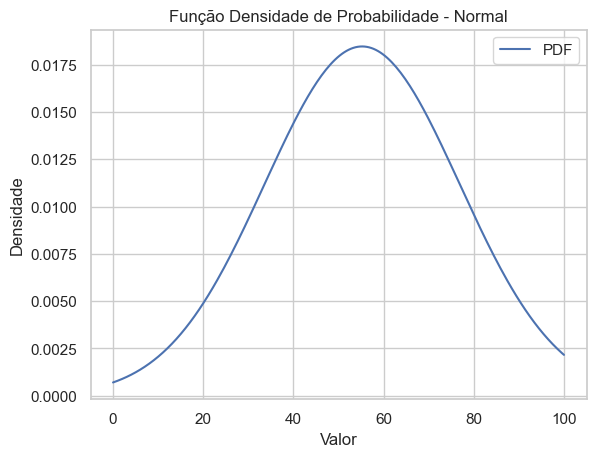

In [48]:
valores = np.linspace(0, 100, 200)

# Função densidade de probabilidade (PDF)
probabilities = dist.pdf(valores)
plt.plot(valores, probabilities, label='PDF')
plt.title('Função Densidade de Probabilidade - Normal')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

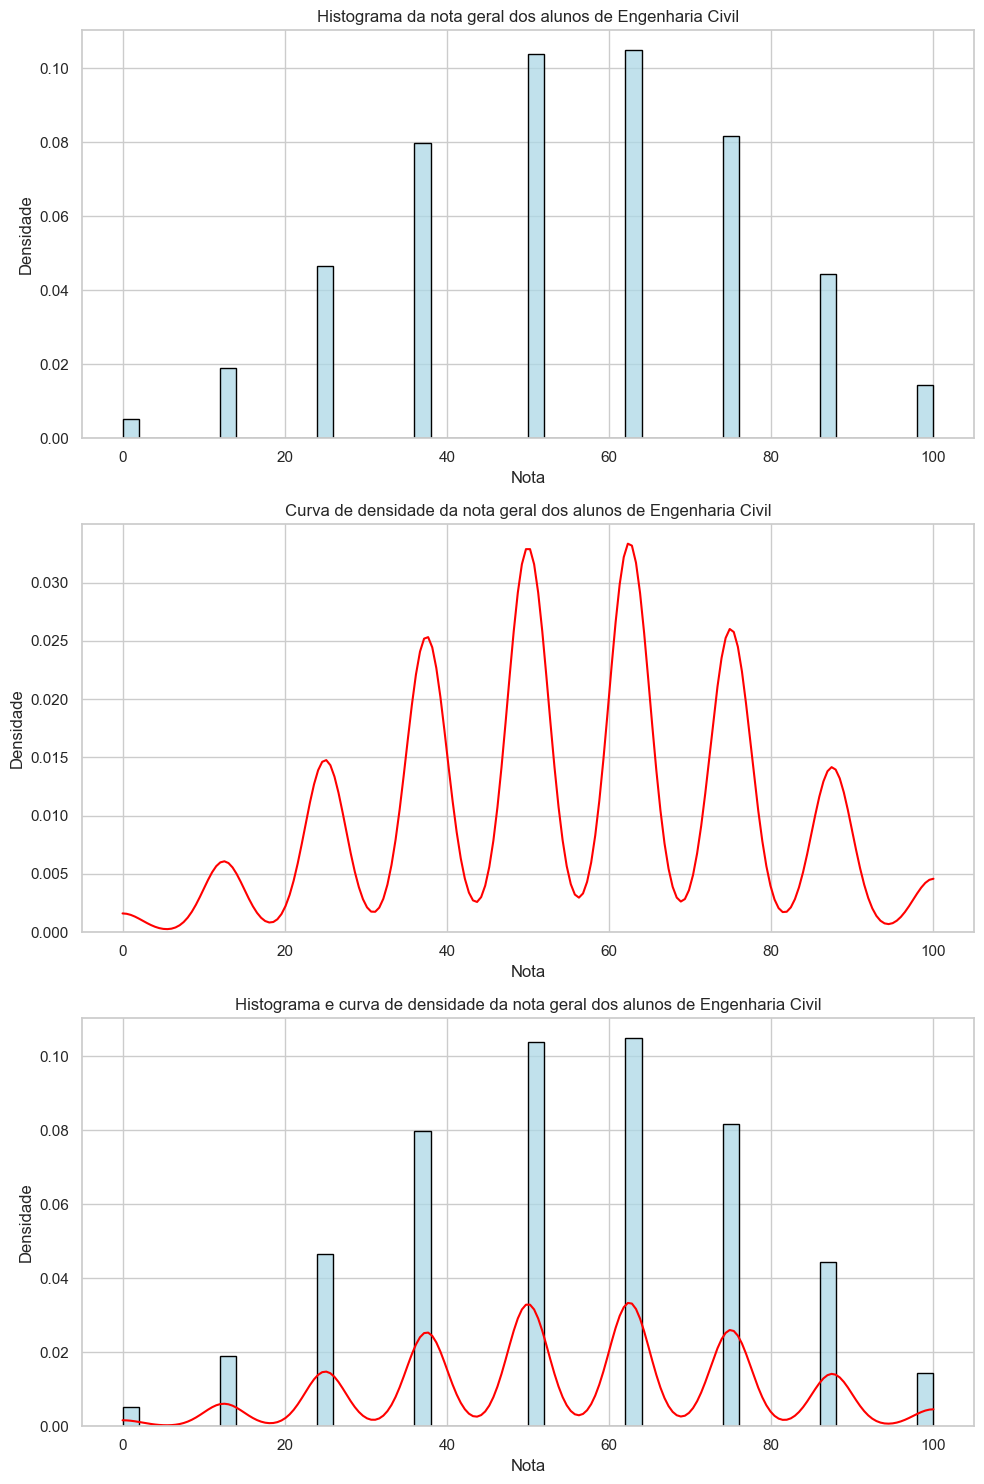

In [49]:
# Gráficos da análise descritiva para nota dos alunos de ADS
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histograma
sns.histplot(engenharia_civil_dropna['NT_OBJ_FG'], bins=50, stat='density', color='lightblue', ax=axs[0], edgecolor='black')
axs[0].set_title('Histograma da nota geral dos alunos de Engenharia Civil')
axs[0].set_xlabel('Nota')
axs[0].set_ylabel('Densidade')

# Curva de densidade
sns.kdeplot(engenharia_civil_dropna['NT_OBJ_FG'], color='red', ax=axs[1], bw_adjust=1,  cut=0, gridsize=200)
axs[1].set_title('Curva de densidade da nota geral dos alunos de Engenharia Civil')
axs[1].set_xlabel('Nota')
axs[1].set_ylabel('Densidade')

# Histograma e curva de densidade juntos
sns.histplot(engenharia_civil_dropna['NT_OBJ_FG'], bins=50, stat='density', color='lightblue', ax=axs[2], edgecolor='black')
sns.kdeplot(engenharia_civil_dropna['NT_OBJ_FG'], color='red', ax=axs[2], bw_adjust=1,  cut=0, gridsize=200)
axs[2].set_title('Histograma e curva de densidade da nota geral dos alunos de Engenharia Civil')
axs[2].set_xlabel('Nota')
axs[2].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

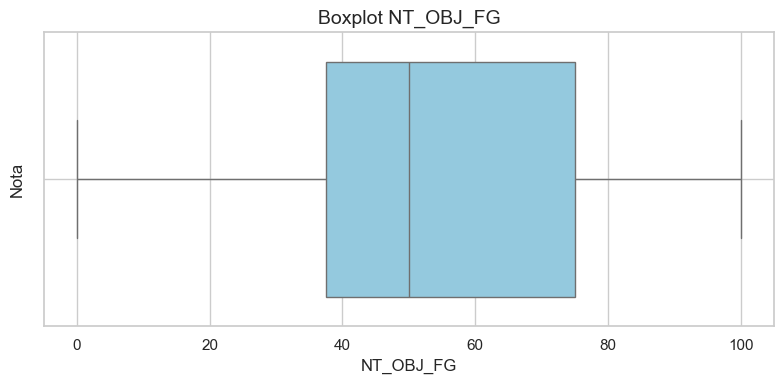

Q1: 37.5
Q3: 75.0
IQR: 37.5
Limite inferior: -18.75
Limite superior: 131.25
Número de outliers: 0
Series([], Name: NT_OBJ_FG, dtype: float64)


In [ ]:
# Estilo visual
sns.set_style('whitegrid')
 
# Criando o boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=engenharia_civil_dropna['NT_OBJ_FG'], color='skyblue')
 
# Personalização
plt.title('Gráfico de Boxplot para Notas Gerais', fontsize=14)
plt.ylabel('Nota', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
 
# Calculando Q1, Q3 e IQR
q1 = engenharia_civil_dropna['NT_OBJ_FG'].quantile(0.25)
q3 = engenharia_civil_dropna['NT_OBJ_FG'].quantile(0.75)
iqr = q3 - q1
 
# Definindo os limites inferior e superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
 
# Identificando os outliers
outliers = engenharia_civil_dropna[(engenharia_civil_dropna['NT_OBJ_FG'] < limite_inferior) | (engenharia_civil_dropna['NT_OBJ_FG'] > limite_superior)]
 
# Exibindo resultados
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Limite inferior: {limite_inferior}")
print(f"Limite superior: {limite_superior}")
print(f"Número de outliers: {outliers.shape[0]}")
print(outliers['NT_OBJ_FG'])

##### Raça

C:\Users\Matheus\AppData\Local\Temp\ipykernel_37572\4019448628.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




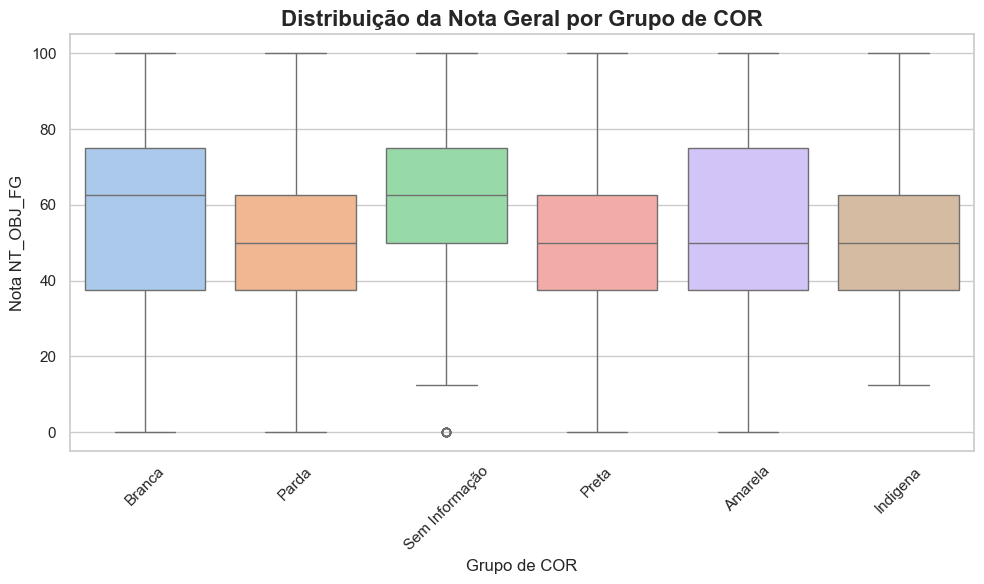

In [66]:
# Estilo visual
 
## Avaliando o desempenho por COR
 
sns.set_theme(style='whitegrid')
 
# Criando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=engenharia_civil_dropna, x='COR', y='NT_OBJ_FG', palette='pastel')
 
# Rótulos e título
plt.xlabel('Grupo de COR', fontsize=12)
plt.ylabel('Nota NT_OBJ_FG', fontsize=12)
plt.title('Distribuição da Nota Geral por Grupo de COR', fontsize=16, weight='bold')
 
# Finalização
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 

##### Região

In [54]:
engenharia_civil_dropna

,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,QE_I02,CO_TURNO_GRADUACAO,REGIAO_CURSO,COR,TURNO
0,87.5,5710,5,A,3,Centro Oeste,Branca,Integral
1,87.5,5710,5,D,3,Centro Oeste,Parda,Integral
2,87.5,5710,5,D,3,Centro Oeste,Parda,Integral
3,75.0,5710,5,A,3,Centro Oeste,Branca,Integral
4,75.0,5710,5,A,3,Centro Oeste,Branca,Integral
...,...,...,...,...,...,...,...,...
534778,75.0,5710,3,F,3,Sul,Sem Informação,Integral
534779,75.0,5710,3,D,3,Sul,Parda,Integral
534780,62.5,5710,3,A,3,Sul,Branca,Integral
534781,50.0,5710,3,A,3,Sul,Branca,Integral


### F- Escolha uma das variáveis ou ambas: Turnos (CO_TURNO_GRADUACAO) ou RAÇA ( QE_I02) e estude o comportamento das notas dos alunos, faça o cruzamento de variáveis, elabore gráficos adequados para cada tipo de variável, se há razão para desconfiar que há uma diferença significativa entre as categorias, de forma geral e entre regiões.

C:\Users\Matheus\AppData\Local\Temp\ipykernel_37572\628524050.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




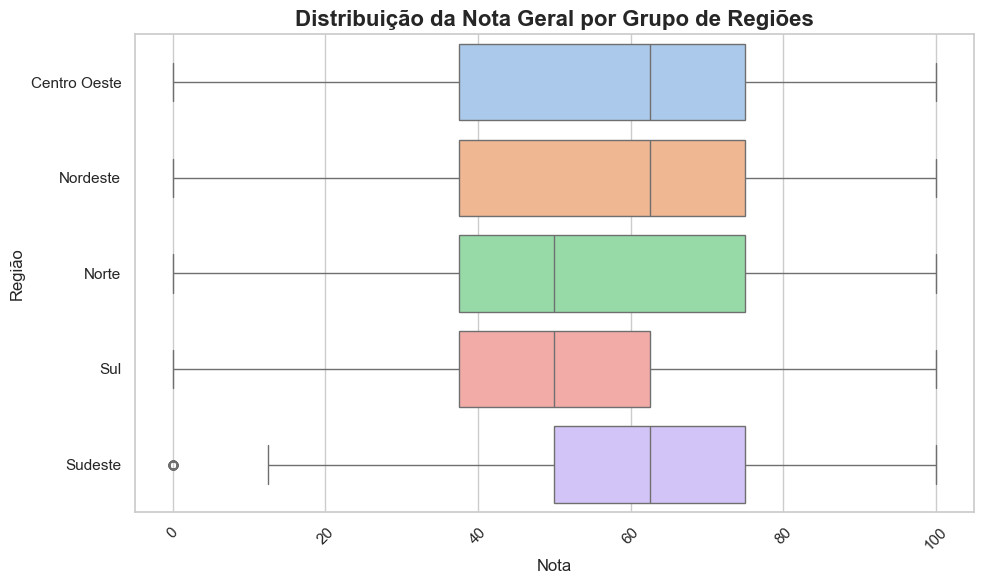

In [93]:
# Estilo visual
 
## Avaliando o desempenho por COR
 
sns.set_theme(style='whitegrid')
 
# Criando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=engenharia_civil_dropna, x='NT_OBJ_FG', y='REGIAO_CURSO', palette='pastel')
 
# Rótulos e título
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Região', fontsize=12)
plt.title('Distribuição da Nota Geral por Grupo de Regiões', fontsize=16, weight='bold')
 
# Finalização
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 

De acordo com o gráfico, a região "Sul" obteve pior desempenho em relação as outras regiões, diferente da região "Sudeste" que obteve o melhor desempenho.

##### Sudeste

C:\Users\Matheus\AppData\Local\Temp\ipykernel_37572\923250015.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




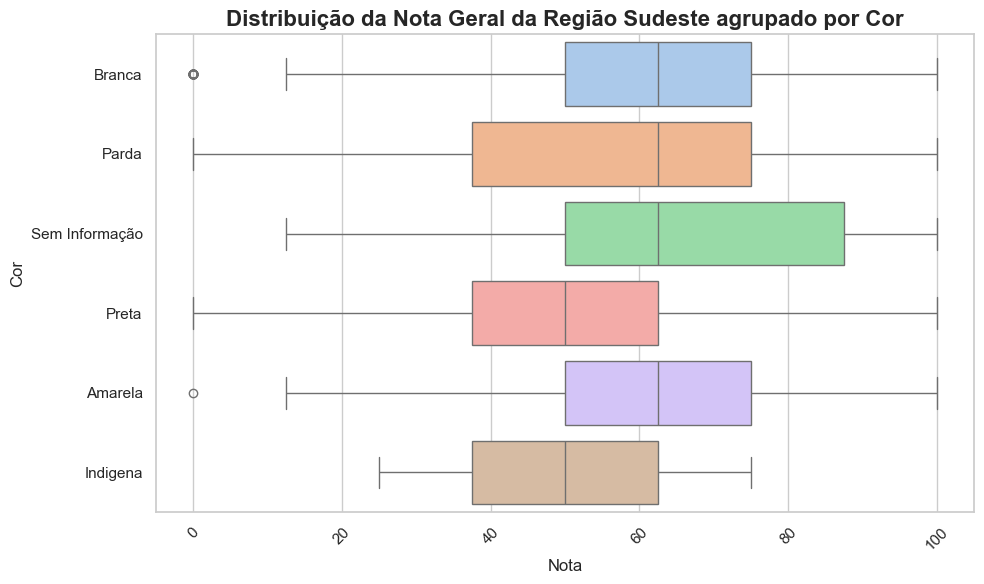

In [70]:
# Estilo visual
 
## Avaliando o desempenho por COR
 
sudeste = engenharia_civil_dropna[engenharia_civil_dropna['REGIAO_CURSO'] == 'Sudeste']

sns.set_theme(style='whitegrid')
 
# Criando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=sudeste, x='NT_OBJ_FG', y='COR', palette='pastel')
 
# Rótulos e título
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Cor', fontsize=12)
plt.title('Distribuição da Nota Geral da Região Sudeste agrupado por Cor', fontsize=16, weight='bold')
 
# Finalização
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 

In [73]:
indigena = sudeste[sudeste['COR'] == 'Indigena']

moda_series = indigena['NT_OBJ_FG'].mode()
moda_value = moda_series.iloc[0] if not moda_series.empty else None

estatistica_indigena = {
    'quantidade': indigena['NT_OBJ_FG'].count(),
    'media': indigena['NT_OBJ_FG'].mean(),
    'mediana': indigena['NT_OBJ_FG'].median(),
    'moda': moda_value,
    'maximo': indigena['NT_OBJ_FG'].max(),
    'minimo': indigena['NT_OBJ_FG'].min(),
    'dp': indigena['NT_OBJ_FG'].std(),
    'cv': indigena['NT_OBJ_FG'].std() / indigena['NT_OBJ_FG'].mean() * 100,
    'assimetria': skew(indigena['NT_OBJ_FG']),
    'curtose': kurtosis(indigena['NT_OBJ_FG'])
}
estatistica_indigena

{'quantidade': np.int64(10),
 'media': np.float64(50.0),
 'mediana': 50.0,
 'moda': np.float64(25.0),
 'maximo': 75.0,
 'minimo': 25.0,
 'dp': 18.633899812498246,
 'cv': np.float64(37.26779962499649),
 'assimetria': np.float64(0.0),
 'curtose': np.float64(-1.3)}

In [72]:
indigena.describe()

,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,CO_TURNO_GRADUACAO
count,10.0000,10.0,10.0,10.000000
mean,50.0000,5710.0,4.0,2.700000
std,18.6339,0.0,0.0,1.251666
min,25.0000,5710.0,4.0,1.000000
25%,37.5000,5710.0,4.0,1.500000
50%,50.0000,5710.0,4.0,3.000000
75%,62.5000,5710.0,4.0,3.750000
max,75.0000,5710.0,4.0,4.000000


In [75]:
preta = sudeste[sudeste['COR'] == 'Preta']

moda_series = preta['NT_OBJ_FG'].mode()
moda_value = moda_series.iloc[0] if not moda_series.empty else None

estatistica_preta = {
    'quantidade': preta['NT_OBJ_FG'].count(),
    'media': preta['NT_OBJ_FG'].mean(),
    'mediana': preta['NT_OBJ_FG'].median(),
    'moda': moda_value,
    'maximo': preta['NT_OBJ_FG'].max(),
    'minimo': preta['NT_OBJ_FG'].min(),
    'dp': preta['NT_OBJ_FG'].std(),
    'cv': preta['NT_OBJ_FG'].std() / preta['NT_OBJ_FG'].mean() * 100,
    'assimetria': skew(preta['NT_OBJ_FG']),
    'curtose': kurtosis(preta['NT_OBJ_FG'])
}
estatistica_preta

{'quantidade': np.int64(122),
 'media': np.float64(52.66393442622951),
 'mediana': 50.0,
 'moda': np.float64(50.0),
 'maximo': 100.0,
 'minimo': 0.0,
 'dp': 20.967649484103518,
 'cv': np.float64(39.814058164367765),
 'assimetria': np.float64(0.009052596312699024),
 'curtose': np.float64(-0.6291137759941225)}

In [76]:
preta.describe()

,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,CO_TURNO_GRADUACAO
count,122.000000,122.0,122.0,122.000000
mean,52.663934,5710.0,4.0,3.467213
std,20.967649,0.0,0.0,0.883124
min,0.000000,5710.0,4.0,1.000000
25%,37.500000,5710.0,4.0,3.000000
50%,50.000000,5710.0,4.0,4.000000
75%,62.500000,5710.0,4.0,4.000000
max,100.000000,5710.0,4.0,4.000000


In [77]:
sem_informacao = sudeste[sudeste['COR'] == 'Sem Informação']

moda_series = sem_informacao['NT_OBJ_FG'].mode()
moda_value = moda_series.iloc[0] if not moda_series.empty else None

estatistica_sem_informacao = {
    'quantidade': sem_informacao['NT_OBJ_FG'].count(),
    'media': sem_informacao['NT_OBJ_FG'].mean(),
    'mediana': sem_informacao['NT_OBJ_FG'].median(),
    'moda': moda_value,
    'maximo': sem_informacao['NT_OBJ_FG'].max(),
    'minimo': sem_informacao['NT_OBJ_FG'].min(),
    'dp': sem_informacao['NT_OBJ_FG'].std(),
    'cv': sem_informacao['NT_OBJ_FG'].std() / sem_informacao['NT_OBJ_FG'].mean() * 100,
    'assimetria': skew(sem_informacao['NT_OBJ_FG']),
    'curtose': kurtosis(sem_informacao['NT_OBJ_FG'])
}
estatistica_sem_informacao

{'quantidade': np.int64(145),
 'media': np.float64(63.793103448275865),
 'mediana': 62.5,
 'moda': np.float64(62.5),
 'maximo': 100.0,
 'minimo': 12.5,
 'dp': 21.282865614713305,
 'cv': np.float64(33.362329882523554),
 'assimetria': np.float64(-0.3737282949271759),
 'curtose': np.float64(-0.5356291603255996)}

In [78]:
sem_informacao.describe()

,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,CO_TURNO_GRADUACAO
count,145.000000,145.0,145.0,145.000000
mean,63.793103,5710.0,4.0,3.296552
std,21.282866,0.0,0.0,0.773916
min,12.500000,5710.0,4.0,1.000000
25%,50.000000,5710.0,4.0,3.000000
50%,62.500000,5710.0,4.0,3.000000
75%,87.500000,5710.0,4.0,4.000000
max,100.000000,5710.0,4.0,4.000000


Na região sudeste o grupo "Indígena" teve o pior desempenho em relação aos outros grupos.
O grupo "Sem Informação" apresentou um desempenho superior aos demais, já que a mediana deste grupo é igual aos grupos "Brancos", "Pardos" e "Amarelos", porém possui um 3º quartil maior em relação a estes.
Comparado com o grupo de "Pretos", os "Indígenas" tiveram um resultado semelhante visualizando pelo gráfico, porém em uma análise mais detalhada observou-se que a média dos "Indígenas" foi menor em relação aos "Pretos".


##### Sul

C:\Users\Matheus\AppData\Local\Temp\ipykernel_37572\3099061639.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




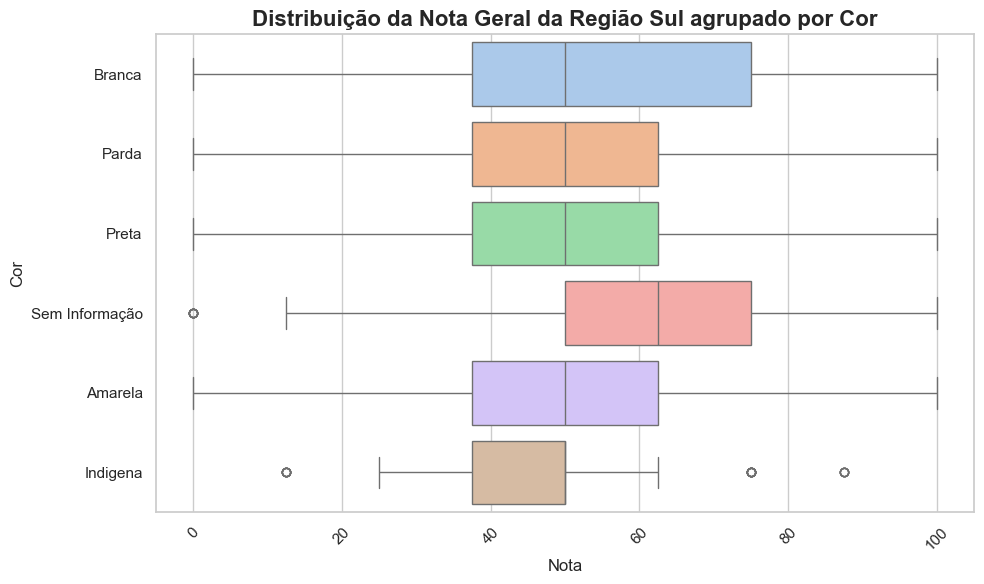

In [87]:
# Estilo visual
 
## Avaliando o desempenho por COR
 
sul = engenharia_civil_dropna[engenharia_civil_dropna['REGIAO_CURSO'] == 'Sul']

sns.set_theme(style='whitegrid')
 
# Criando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=sul, x='NT_OBJ_FG', y='COR', palette='pastel')
 
# Rótulos e título
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Cor', fontsize=12)
plt.title('Distribuição da Nota Geral da Região Sul agrupado por Cor', fontsize=16, weight='bold')
 
# Finalização
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 

In [88]:
indigena = sul[sul['COR'] == 'Indigena']

moda_series = indigena['NT_OBJ_FG'].mode()
moda_value = moda_series.iloc[0] if not moda_series.empty else None

estatistica_indigena = {
    'quantidade': indigena['NT_OBJ_FG'].count(),
    'media': indigena['NT_OBJ_FG'].mean(),
    'mediana': indigena['NT_OBJ_FG'].median(),
    'moda': moda_value,
    'maximo': indigena['NT_OBJ_FG'].max(),
    'minimo': indigena['NT_OBJ_FG'].min(),
    'dp': indigena['NT_OBJ_FG'].std(),
    'cv': indigena['NT_OBJ_FG'].std() / indigena['NT_OBJ_FG'].mean() * 100,
    'assimetria': skew(indigena['NT_OBJ_FG']),
    'curtose': kurtosis(indigena['NT_OBJ_FG'])
}
estatistica_indigena

{'quantidade': np.int64(77),
 'media': np.float64(46.59090909090909),
 'mediana': 50.0,
 'moda': np.float64(50.0),
 'maximo': 87.5,
 'minimo': 12.5,
 'dp': 20.342095204785913,
 'cv': np.float64(43.66108239076001),
 'assimetria': np.float64(0.2803829937727644),
 'curtose': np.float64(-0.5133028791895855)}

In [85]:
indigena.describe()

,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,CO_TURNO_GRADUACAO
count,77.000000,77.0,77.0,77.000000
mean,46.590909,5710.0,3.0,3.675325
std,20.342095,0.0,0.0,0.923973
min,12.500000,5710.0,3.0,1.000000
25%,37.500000,5710.0,3.0,4.000000
50%,50.000000,5710.0,3.0,4.000000
75%,50.000000,5710.0,3.0,4.000000
max,87.500000,5710.0,3.0,4.000000


In [89]:
sem_informacao = sul[sul['COR'] == 'Sem Informação']

moda_series = sem_informacao['NT_OBJ_FG'].mode()
moda_value = moda_series.iloc[0] if not moda_series.empty else None

estatistica_sem_informacao = {
    'quantidade': sem_informacao['NT_OBJ_FG'].count(),
    'media': sem_informacao['NT_OBJ_FG'].mean(),
    'mediana': sem_informacao['NT_OBJ_FG'].median(),
    'moda': moda_value,
    'maximo': sem_informacao['NT_OBJ_FG'].max(),
    'minimo': sem_informacao['NT_OBJ_FG'].min(),
    'dp': sem_informacao['NT_OBJ_FG'].std(),
    'cv': sem_informacao['NT_OBJ_FG'].std() / sem_informacao['NT_OBJ_FG'].mean() * 100,
    'assimetria': skew(sem_informacao['NT_OBJ_FG']),
    'curtose': kurtosis(sem_informacao['NT_OBJ_FG'])
}
estatistica_sem_informacao

{'quantidade': np.int64(586),
 'media': np.float64(58.553754266211605),
 'mediana': 62.5,
 'moda': np.float64(62.5),
 'maximo': 100.0,
 'minimo': 0.0,
 'dp': 22.790125944852633,
 'cv': np.float64(38.921716003449596),
 'assimetria': np.float64(-0.373996389927773),
 'curtose': np.float64(-0.41866734397693994)}

In [91]:
sul.describe()

,NT_OBJ_FG,CO_GRUPO,CO_REGIAO_CURSO,CO_TURNO_GRADUACAO
count,24941.00000,24941.0,24941.0,24941.000000
mean,53.44914,5710.0,3.0,3.560322
std,21.46771,0.0,0.0,0.960956
min,0.00000,5710.0,3.0,1.000000
25%,37.50000,5710.0,3.0,4.000000
50%,50.00000,5710.0,3.0,4.000000
75%,62.50000,5710.0,3.0,4.000000
max,100.00000,5710.0,3.0,4.000000


Na região Sul o grupo "Indígena" teve o pior desempenho em relação aos outros grupos.
O grupo "Sem Informação" apresentou um desempenho superior aos demais, já que a mediana deste grupo foi superior aos demais.

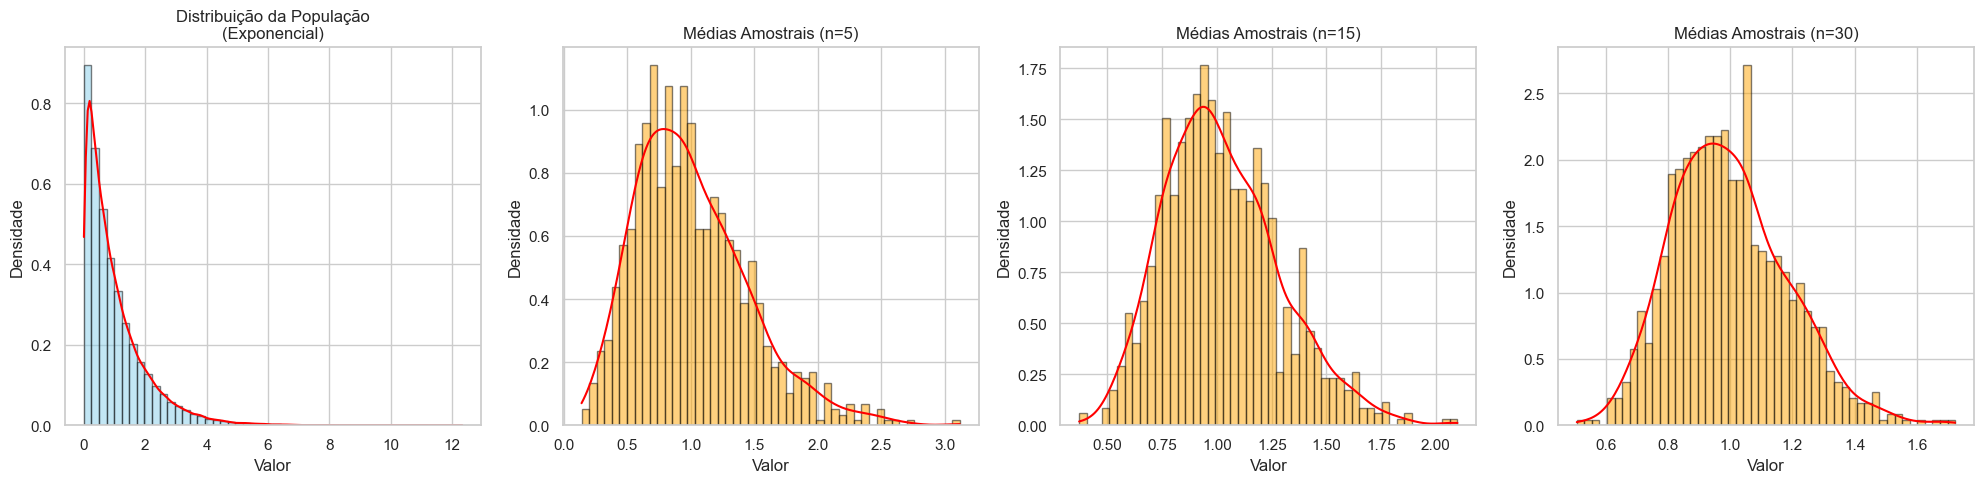

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
 
# Parâmetros
num_amostras = 1000  # Número de médias amostrais
ns = [5, 15, 30]  # Diferentes tamanhos de amostras
 
# População original - Exponencial (não normal)
populacao = np.random.exponential(scale=1.0, size=100000)
 
plt.figure(figsize=(20, 5))
 
# Função para plotar histograma + KDE
def plot_hist_kde(data, subplot_index, title, color):
    plt.subplot(1, 4, subplot_index)
    plt.hist(data, bins=50, density=True, alpha=0.5, color=color, edgecolor='black')
    kde = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 200)
    plt.plot(x, kde(x), color='red')
    plt.title(title)
    plt.xlabel('Valor')
    plt.ylabel('Densidade')
 
# Plotar distribuição da população
plot_hist_kde(populacao, 1, 'Distribuição da População\n(Exponencial)', 'skyblue')
 
# Plotar distribuições das médias amostrais para diferentes n
for i, n in enumerate(ns, 2):
    medias_amostrais = [np.mean(np.random.choice(populacao, n, replace=True)) for _ in range(num_amostras)]
    plot_hist_kde(medias_amostrais, i, f'Médias Amostrais (n={n})', 'orange')
 
plt.tight_layout()
plt.show()
 
 